In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime


In [55]:
# Dataset: Monthly Russian occupation percentages
data = [
    ('2022-01', 7.5), ('2022-02', 15.0), ('2022-03', 27.0), ('2022-04', 22.0),
    ('2022-05', 20.0), ('2022-06', 20.0), ('2022-07', 19.0), ('2022-08', 18.0),
    ('2022-09', 18.0), ('2022-10', 17.5), ('2022-11', 17.0), ('2022-12', 18.0),
    ('2023-01', 18.5), ('2023-02', 19.0), ('2023-03', 19.0), ('2023-04', 19.0),
    ('2023-05', 19.0), ('2023-06', 19.0), ('2023-07', 19.5), ('2023-08', 20.0),
    ('2023-09', 20.0), ('2023-10', 20.0), ('2023-11', 20.0), ('2023-12', 20.0),
    ('2024-01', 20.2), ('2024-02', 20.4), ('2024-03', 20.5), ('2024-04', 20.7),
    ('2024-05', 20.9), ('2024-06', 21.0), ('2024-07', 21.1), ('2024-08', 21.2),
    ('2024-09', 21.3), ('2024-10', 21.4), ('2024-11', 21.5), ('2024-12', 21.6),
    ('2025-01', 21.7), ('2025-02', 21.8), ('2025-03', 21.9), ('2025-04', 22.0),
    ('2025-05', 22.1), ('2025-06', 22.2), ('2025-07', 22.3), ('2025-08', 22.4),
    ('2025-09', 22.5)
]


In [54]:
# Create DataFrame
df = pd.DataFrame(data, columns=['Date', 'Russian_Occupation_Percent'])
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


In [32]:
# Prepare data for linear regression
df['Month_Number'] = (df['Date'] - df['Date'].min()).dt.days / 30.44  # Approx months
X = df['Month_Number'].values.reshape(-1, 1)
y = df['Russian_Occupation_Percent'].values


In [53]:
# Fit linear regression
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
# Project 2 years into the future
future_months = np.array([[df['Month_Number'].max() + i] for i in range(1, 25)]).reshape(-1, 1)
projections = model.predict(future_months)

In [52]:
# Compute 95% confidence interval
y_pred = model.predict(X)
residuals = y - y_pred
std_error = np.std(residuals) * 1.96  # 95% CI (~2 std errors)
upper_bound = projections + std_error
lower_bound = projections - std_error


In [51]:
# Future dates
last_date = df['Date'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=24, freq='M')

C:\Users\bangl\AppData\Local\Temp\ipykernel_57484\63925845.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=24, freq='M')


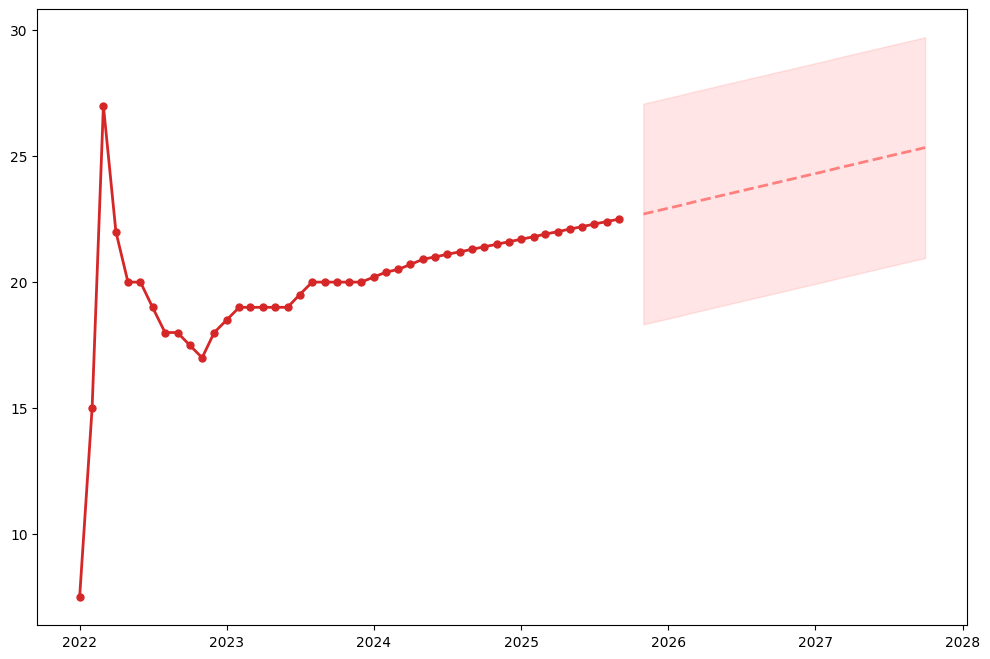

In [50]:
# Plot the graph
plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['Russian_Occupation_Percent'], marker='o', linewidth=2, markersize=5, color='#d62728', label='Historical Data')
plt.plot(future_dates, projections, linestyle='--', linewidth=2, color='#ff7f7f', label='Linear Projection')
plt.fill_between(future_dates, lower_bound, upper_bound, color='#ff7f7f', alpha=0.2, label='95% Confidence Interval')


In [49]:
# Add data labels for key points
key_points = [
    (datetime(2022, 1, 1), 7.5, 'Pre-Invasion'),
    (datetime(2022, 3, 1), 27.0, 'Peak Occupation'),
    (datetime(2022, 11, 1), 17.0, 'Post-Counteroffensives'),
    (datetime(2025, 9, 1), 22.5, 'Latest Historical'),
    (future_dates[-1], projections[-1], 'Sep 2027')
]

for date, value, label in key_points:
    plt.text(date, value + 0.5, f'{value}%', fontsize=10, ha='center', color='#333333')


ValueError: Image size of 10461271x10218 pixels is too large. It must be less than 2^23 in each direction.

<Figure size 640x480 with 1 Axes>

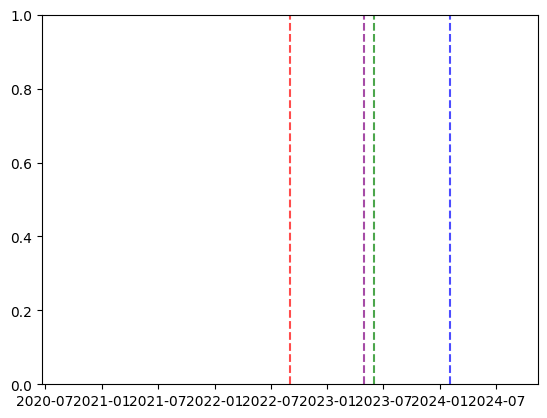

In [47]:
# Annotations for key events
plt.axvline(x=datetime(2022, 9, 1), color='red', linestyle='--', alpha=0.7, label='Kherson/Kharkiv Counteroffensives')
plt.axvline(x=datetime(2023, 5, 1), color='purple', linestyle='--', alpha=0.7, label='Bakhmut Falls (May 2023)')
plt.axvline(x=datetime(2023, 6, 1), color='green', linestyle='--', alpha=0.7, label='Ukrainian Summer Counteroffensive')
plt.axvline(x=datetime(2024, 2, 1), color='blue', linestyle='--', alpha=0.7, label='Avdiivka Falls (Feb 2024)')


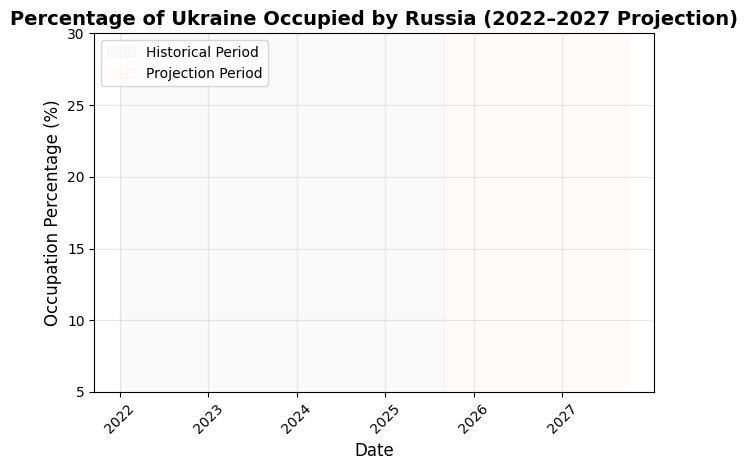

In [ ]:
# Background shading: historical vs. projection
plt.axvspan(df['Date'].min(), df['Date'].max(), color='#f0f0f0', alpha=0.3, label='Historical Period')
plt.axvspan(df['Date'].max(), future_dates[-1], color='#ffe6e6', alpha=0.15, label='Projection Period')

# Styling
plt.title('Percentage of Ukraine Occupied by Russia (2022–2027 Projection)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Occupation Percentage (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(5, 30)
# Show only year ticks from data
years = sorted(set(df['Date'].dt.year))
plt.xticks([datetime(year, 1, 1) for year in years], years, rotation=45)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()

plt.show()